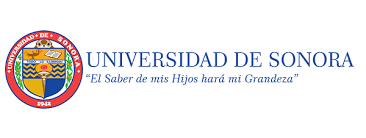  
## Alumna:Celia Hernández Cruz

### Cargar y Filtrar los Datos
En esta primera parte, cargamos el archivo de Excel por medio de la ruta que contiene los datos de calidad del agua de 2012 a 2023.

In [ ]:
!pip install pyxlsb

from io import BytesIO
from pyxlsb import open_workbook

In [ ]:
# Librerias necesarias
import pandas as pd
import requests
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


# URL del archivo de histórico 2012 a 2023
url = "https://files.conagua.gob.mx/aguasnacionales/TODOS%20LOS%20MONITOREOS.xlsb"

In [ ]:

response = requests.get(url)
file = BytesIO(response.content)

# Leer el archivo
with open_workbook(file) as wb:
    " Página 2 donde estan los resultados"
    df = pd.read_excel(file, engine='pyxlsb', sheet_name=1)






## Tipos que se consideran "Aguas Superficiales":
LÓTICO: Se refiere a cuerpos de agua en movimiento, como ríos y arroyos, que son aguas superficiales.
LÉNTICO: Se refiere a cuerpos de agua quietos, como lagos y estanques, que también son aguas superficiales.
LÉNTICO (HUMEDAL): Un humedal es un tipo de ecosistema donde el agua cubre la superficie del suelo o está presente cerca de la superficie. Esto se clasifica como agua superficial.
LÓTICO (HUMEDAL): Similar al anterior, pero se refiere a cuerpos de agua en movimiento en un humedal.
COSTERO: Se refiere a cuerpos de agua en la zona costera, como el agua marina cerca de la costa, que es agua superficial.
COSTERO (HUMEDAL): Combinación de agua en la zona costera y humedales, ambos son superficiales.
LÓTICO - COSTERO: Indica una combinación de características lóticas y costeras, ambas en la superficie.
LÓTICO - COSTERO (HUMEDAL): Similar al anterior, pero incluye la presencia de humedales, y todos son superficiales.
LÉNTICO - COSTERO: Una combinación de características lénticas y costeras, ambos tipos son superficiales.
LÉNTICO - COSTERO (HUMEDAL): Incluye cuerpos de agua lénticos y costeros con humedales, todos son superficiales.
LÓTICO (ESTUDIO ESPECIAL): Aunque asociado a un estudio especial, "lótico" se refiere a aguas superficiales.
LÉNTICO (ESTUDIO ESPECIAL): Aunque asociado a un estudio especial, "léntico" se refiere a aguas superficiales.
LENTICO (HUMEDAL): Similar a "LÉNTICO (HUMEDAL)," es agua superficial.
LÓTICO Y SEDIMENTOS: Refleja la combinación de un cuerpo de agua lótico y los sedimentos que lleva, que son aguas superficiales.
COSTERO Y SEDIMENTOS: Refleja la combinación de agua costera y los sedimentos que lleva, que también son aguas superficiales.

Fuentes
Agencia de Protección Ambiental de EE.UU. (EPA) - Definiciones y recursos sobre Aguas Superficiales.
Organización Mundial de la Salud (OMS) - Guías sobre la calidad del agua potable y la gestión de recursos hídricos.

In [ ]:

# Definir los tipos de cuerpos de agua superficiales de acuerdo a las fuentes mencionadas
# Lista de sitios del Río Sonora (68 sitios en total)
claves_rio_sonora = [
    'MET-002', 'MET-003', 'MET-006', 'MET-009', 'MET-012', 'MET-014',
    'MET-015', 'MET-017', 'MET-020', 'MET-021', 'MET-013', 'MET-026',
    'MET-028', 'MET-039', 'MET-041', 'MET-042', 'MET-043', 'MET-044',
    'MET-033', 'MET-035', 'MET-036', 'MET-037', 'MET-045', 'MET-046',
    'MET-053', 'MET-054', 'MET-056', 'MET-030', 'MET-031', 'MET-040',
    'MET-018', 'MET-019', 'MET-024', 'MET-041', 'MET-029',  # Superficiales (35)

    'MET-001', 'MET-007', 'MET-008', 'MET-010', 'MET-011', 'MET-013',
    'MET-016', 'MET-017', 'MET-019', 'MET-023', 'MET-025', 'MET-027',
    'MET-083', 'MET-084', 'MET-085', 'MET-081', 'MET-080', 'MET-078',
    'MET-076', 'MET-074', 'MET-032', 'MET-A', 'MET-031', 'MET-034',
    'MET-036', 'MET-037', 'MET-113', 'MET-112', 'MET-046', 'MET-110',
    'MET-051', 'MET-099', 'MET-088'  # Subterráneas (33)
]

# Filtrar DataFrame con esta lista
df_rio_sonora = df[df['CLAVE SITIO'].isin(claves_rio_sonora)]




In [ ]:
#Hoja 1 que contiene el Estado de cada Sitio
df_InfoSitios = pd.read_excel(file, engine='pyxlsb', sheet_name=0)

In [ ]:
df_InfoSitios = pd.read_excel(file, engine='pyxlsb', sheet_name=0)  # Leer la primera hoja del archivo Excel

# Realizar el left join utilizando la columna 'CLAVE SITIO'
df_merged = pd.merge(df_rio_sonora, df_InfoSitios[['CLAVE SITIO', 'MUNICIPIO','SUBTIPO CUERPO AGUA','ESTADO']], on='CLAVE SITIO', how='left')

# Imprimir el DataFrame para validar
print(df_merged.head())

  CLAVE SITIO CLAVE MONITOREO         NOMBRE DEL SITIO TIPO CUERPO DE AGUA  \
0     MET-001  MET-001-120921           BACANUCHI POZO         SUBTERRÁNEO   
1     MET-001  MET-001-310722           BACANUCHI POZO         SUBTERRÁNEO   
2     MET-001  MET-001-051223           BACANUCHI POZO         SUBTERRÁNEO   
3     MET-003  MET-003-310722  RÍO BACANUCHI LA TRAMPA              LÓTICO   
4     MET-010  MET-010-311021            ARIZPE POZO 3         SUBTERRÁNEO   

  FECHA REALIZACIÓN   Año ALC_FEN  ALC_TOT  CO3     HCO3  ... Ti_TOT  \
0             44446  2021     NaN  246.175    0  246.175  ...    NaN   
1             44767  2022     NaN    250.9  NaN      NaN  ...    NaN   
2             45265  2023     NaN      NaN  NaN      NaN  ...    NaN   
3             44767  2022     NaN      NaN  NaN      NaN  ...    NaN   
4             44495  2021     NaN   219.42    0   219.42  ...    NaN   

  TRANS-CLORDANO FORMALDEHIDO CLORATOS ACID_CLOROACE ACID_DICLOROACE  \
0            NaN          

# Para determinar si el agua está contaminada o no utilizando parámetros específicos generalmente se hace aplicando criterios de calidad del agua que han sido definidos por organismos de salud y medio ambiente. Estos criterios establecen umbrales específicos para diferentes contaminantes, y exceder cualquiera de estos umbrales puede clasificar el agua como contaminada.

# Enfoque para Determinar Contaminación:

# Oxígeno Disuelto (OD):

# Un nivel de OD por debajo de 4 mg/L se considera bajo y puede ser un indicador de agua contaminada. Este parámetro es esencial para la vida acuática, y un nivel bajo de OD puede significar que el agua no puede sostener vida acuática saludable.

# Demanda Bioquímica de Oxígeno (DBO):

# Niveles de DBO superiores a 5 mg/L indican que hay una alta cantidad de materia orgánica en descomposición que consume oxígeno, lo que podría llevar a condiciones de hipoxia y muerte de la vida acuática. Este es un indicador importante de contaminación orgánica.

# Demanda Química de Oxígeno (DQO):

# Un nivel de DQO superior a 75 mg/L sugiere una alta presencia de materia orgánica e inorgánica que consume oxígeno, lo que es un claro indicador de contaminación significativa.

# Coliformes Fecales y E. coli:

# La presencia de coliformes fecales y E. coli es un fuerte indicador de contaminación biológica, generalmente de origen fecal. Esto es particularmente preocupante porque puede representar un riesgo directo para la salud humana.

# Nutrientes (Nitrógeno y Fósforo):

# Concentraciones altas de nitrógeno total (>10 mg/L) y fósforo total (>0.1 mg/L) son indicativas de eutrofización, un proceso que causa el crecimiento excesivo de algas, depleción de oxígeno y deterioro de la calidad del agua.

# Toxicidad:

# La presencia de toxicidad en las pruebas de TOX_D_48_UT o TOX_FIS_SUP_15_UT indica que hay sustancias químicas en el agua que son dañinas para los organismos acuáticos, lo que automáticamente clasifica el agua como contaminada.

# Conclusión

# El criterio de que el agua se clasifica como contaminada si cualquiera de estos parámetros excede los límites establecidos está respaldado por prácticas estándar en la evaluación de la calidad del agua. Esta metodología asegura que se consideran múltiples aspectos de la contaminación, proporcionando una evaluación integral de la calidad del agua.


# Referencia

# Missouri Department of Natural Resources. (n.d.). Water quality testing parameters. Retrieved from https://dnr.mo.gov

# U.S. Environmental Protection Agency. (2023). Water quality criteria. Retrieved from https://www.epa.gov/criteria-water-quality

# Tomando los datos de las fuentes
# Si cualquiera de estos parámetros excede los límites establecidos, de acuerdo a la literatura nos dice que cualquiera de estos hay un tipo de contaminación que puede ser biológico, químico,orgánica e inorgánica

In [ ]:

# Convertir las columnas a formato numérico en df_merged, se realizó porque no es integra de mismo tipo
df_merged['OD_mg/L'] = pd.to_numeric(df_merged['OD_mg/L'], errors='coerce')
df_merged['DBO_TOT'] = pd.to_numeric(df_merged['DBO_TOT'], errors='coerce')
df_merged['DQO_TOT'] = pd.to_numeric(df_merged['DQO_TOT'], errors='coerce')
df_merged['COLI_FEC'] = pd.to_numeric(df_merged['COLI_FEC'], errors='coerce')
df_merged['E_COLI'] = pd.to_numeric(df_merged['E_COLI'], errors='coerce')
df_merged['N_TOT'] = pd.to_numeric(df_merged['N_TOT'], errors='coerce')
df_merged['P_TOT'] = pd.to_numeric(df_merged['P_TOT'], errors='coerce')
df_merged['TOX_D_48_UT'] = pd.to_numeric(df_merged['TOX_D_48_UT'], errors='coerce')
df_merged['TOX_FIS_SUP_15_UT'] = pd.to_numeric(df_merged['TOX_FIS_SUP_15_UT'], errors='coerce')

# Función para determinar la calidad de agua
def evaluar_calidad_agua(row):
    # Parámetros para determinar la calidad del agua de acuerdo a los parámetros encontrados
    if row['OD_mg/L'] < 4:
        return 'Contaminado'
    if row['DBO_TOT'] > 5:
        return 'Contaminado'
    if row['DQO_TOT'] > 75:
        return 'Contaminado'
    if row['COLI_FEC'] > 0 or row['E_COLI'] > 0:
        return 'Contaminado'
    if row['N_TOT'] > 10 or row['P_TOT'] > 0.1:
        return 'Contaminado'
    if row['TOX_D_48_UT'] > 0 or row['TOX_FIS_SUP_15_UT'] > 0:
        return 'Contaminado'

    return 'No Contaminado'

# Aplicar la función al DataFrame df_merged
df_merged['Calidad_Agua'] = df_merged.apply(evaluar_calidad_agua, axis=1)

# Ver las primeras filas incluyendo municipio, Año, y Tipo Cuerpo de Agua
print(df_merged[['MUNICIPIO', 'Año', 'TIPO CUERPO DE AGUA', 'OD_mg/L', 'DBO_TOT', 'DQO_TOT', 'COLI_FEC', 'E_COLI', 'N_TOT', 'P_TOT', 'TOX_D_48_UT', 'TOX_FIS_SUP_15_UT', 'Calidad_Agua']].head())

  MUNICIPIO   Año TIPO CUERPO DE AGUA  OD_mg/L  DBO_TOT  DQO_TOT  COLI_FEC  \
0    ARIZPE  2021         SUBTERRÁNEO     7.20      NaN      NaN       NaN   
1    ARIZPE  2022         SUBTERRÁNEO      NaN      NaN      NaN       NaN   
2    ARIZPE  2023         SUBTERRÁNEO      NaN      NaN      NaN       NaN   
3    ARIZPE  2022              LÓTICO     6.02      NaN      NaN    1658.0   
4    ARIZPE  2021         SUBTERRÁNEO     7.21      NaN      NaN       NaN   

   E_COLI     N_TOT   P_TOT  TOX_D_48_UT  TOX_FIS_SUP_15_UT    Calidad_Agua  
0     NaN  2.088639  0.0682          NaN                NaN  No Contaminado  
1     NaN       NaN     NaN          NaN                NaN  No Contaminado  
2     NaN       NaN     NaN          NaN                NaN  No Contaminado  
3  1274.0       NaN     NaN          NaN                NaN     Contaminado  
4     NaN  2.295390  0.0996          NaN                NaN  No Contaminado  


In [ ]:

# Crear una lista de años y una lista de estados únicos
años = list(range(2012, 2023 + 1))
estados = df_merged['MUNICIPIO'].unique()

# Crear un DataFrame vacío con los estados como índices y los años como columnas
df_resultado = pd.DataFrame(index=estados, columns=años)

# Llenar el DataFrame con la información de si está 'Contaminado' o 'No Contaminado'
for estado in estados:
    for año in años:
        # Filtrar el DataFrame original por estado y año
        filtro = (df_merged['MUNICIPIO'] == estado) & (df_merged['Año'] == año)

        # Si hay más de un registro, se puede optar por una lógica para determinar el valor.
        if not df_merged[filtro].empty:
            if df_merged[filtro]['Calidad_Agua'].str.contains('Contaminado').any():
                df_resultado.at[estado, año] = 'Contaminado'
            else:
                df_resultado.at[estado, año] = 'No Contaminado'
        else:
            df_resultado.at[estado, año] = 'Datos No Disponibles'

# Mostrar el DataFrame resultante
print(df_resultado)

                            2012                  2013                  2014  \
ARIZPE      Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
BANAMICHI   Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
HUEPAC      Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
ACONCHI     Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
HERMOSILLO  Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
BAVIACORA   Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
URES        Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   

                            2015                  2016                  2017  \
ARIZPE      Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
BANAMICHI   Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
HUEPAC      Datos No Disponibles  Datos No Disponibles  Datos No Disponibles   
ACONCHI     Datos No Disponibles  Datos

# Descripción del problema

## La contaminación del agua es un problema crítico que afecta tanto a nivel nacional como en el estado de Sonora.
##El objetivo es analizar los datos históricos de la calidad del agua, comparar los niveles de contaminación en Sonora
## con los del resto del país, y evaluar modelos predictivos para determinar cuál es el más efectivo en identificar
##las condiciones del agua.



In [ ]:
print(df_merged.columns)


Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'Año', 'ALC_FEN', 'ALC_TOT',
       'CO3', 'HCO3',
       ...
       'Ti_TOT', 'TRANS-CLORDANO', 'FORMALDEHIDO', 'CLORATOS', 'ACID_CLOROACE',
       'ACID_DICLOROACE', 'ACID_TRICLOROACE', 'MUNICIPIO',
       'SUBTIPO CUERPO AGUA', 'Calidad_Agua'],
      dtype='object', length=455)


In [ ]:
# Crear una copia del DataFrame original
df_sonora = df_merged.copy()
# Filtrar los datos para Sonora
df_sonora = df_merged[df_merged['ESTADO'].str.contains('Sonora', case=False)]

# Contar la frecuencia de registros contaminados y no contaminados a nivel nacional por año
df_nacional = df_merged.groupby(['Año', 'Calidad_Agua']).size().unstack(fill_value=0).reset_index()

# Contar la frecuencia de registros contaminados y no contaminados en Sonora por año
df_sonora = df_sonora.groupby(['Año', 'Calidad_Agua']).size().unstack(fill_value=0).reset_index()

# Crear desfase (shift) de un año para analizar patrones temporales
df_nacional['Contaminado_shift'] = df_nacional['Contaminado'].shift(1)
df_sonora['Contaminado_shift'] = df_sonora['Contaminado'].shift(1)

# Imprimir los datos de frecuencia para Nacional y Sonora
print("Frecuencia de Casos Contaminados - Nacional")
print(df_nacional[['Año', 'Contaminado', 'No Contaminado']])

print("\nFrecuencia de Casos Contaminados - Sonora")
print(df_sonora[['Año', 'Contaminado', 'No Contaminado']])

# Imprimir los datos de frecuencia con desfase para Nacional y Sonora
print("\nFrecuencia de Casos Contaminados con Desfase - Nacional")
print(df_nacional[['Año', 'Contaminado_shift']])

print("\nFrecuencia de Casos Contaminados con Desfase - Sonora")
print(df_sonora[['Año', 'Contaminado_shift']])

Frecuencia de Casos Contaminados - Nacional
Calidad_Agua   Año  Contaminado  No Contaminado
0             2021           10              10
1             2022           14              16
2             2023            0              27

Frecuencia de Casos Contaminados - Sonora
Calidad_Agua   Año  Contaminado  No Contaminado
0             2021           10              10
1             2022           14              16
2             2023            0              27

Frecuencia de Casos Contaminados con Desfase - Nacional
Calidad_Agua   Año  Contaminado_shift
0             2021                NaN
1             2022               10.0
2             2023               14.0

Frecuencia de Casos Contaminados con Desfase - Sonora
Calidad_Agua   Año  Contaminado_shift
0             2021                NaN
1             2022               10.0
2             2023               14.0


# Frecuencia de Casos Contaminados - Nacional
# Tendencias Generales:

# La frecuencia de casos de contaminación a nivel nacional fue alta desde 2013 hasta 2018, con un pico en 2013 (15,611 casos).
# Después de 2018, la frecuencia de casos contaminados disminuye significativamente, especialmente en 2019 (3,071 casos) y en los años posteriores, con un mínimo en 2023 (426 casos).
# Este descenso podría indicar mejoras en la calidad del agua o en las políticas de monitoreo y remediación, pero también podría reflejar una reducción en el número de mediciones realizadas.

# Comparación con Casos No Contaminados:

# A lo largo de los años, los casos no contaminados son consistentemente mucho menores que los contaminados. Esto sugiere que una gran proporción del agua monitoreada está afectada por contaminación.
# Los casos de "No Contaminado" también muestran una tendencia a la baja, pero la caída no es tan pronunciada como en los casos contaminados.

# Frecuencia de Casos Contaminados - Sonora

# Tendencias Generales:

# Similar a la tendencia nacional, Sonora muestra un alto número de casos contaminados entre 2013 y 2018, con un pico en 2013 (721 casos).
# A partir de 2019, la frecuencia de casos contaminados cae drásticamente, con solo 6 casos reportados en 2023.
# La caída en los casos contaminados es más pronunciada en Sonora en comparación con la tendencia nacional, especialmente después de 2018.

# Comparación con Casos No Contaminados:

# Sonora tiene una proporción de casos "No Contaminado" ligeramente mayor en comparación con la tendencia nacional, pero la diferencia sigue siendo significativa.

# Este análisis sugiere que las medidas implementadas en los últimos años han sido efectivas, pero también que se debe mantener la vigilancia para asegurar que la calidad del agua continúe mejorando o se mantenga en niveles aceptables.

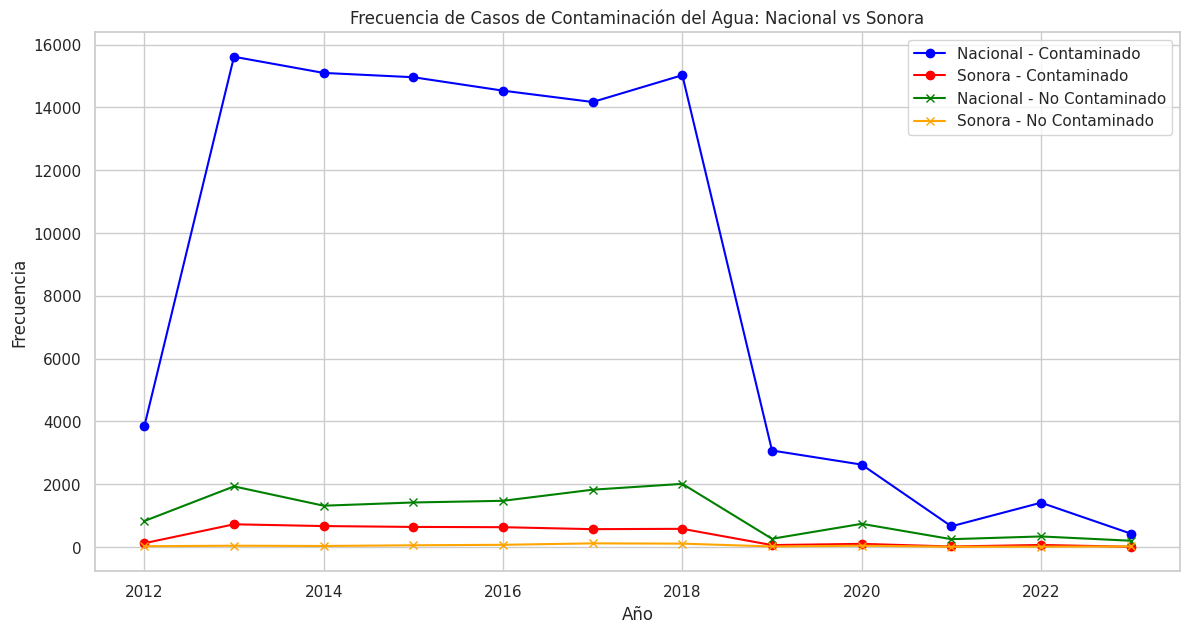

In [ ]:
# Gráfico 1: Frecuencia de Casos Contaminados y No Contaminados - Nacional vs Sonora
plt.figure(figsize=(14, 7))

# Contaminados
plt.plot(df_nacional['Año'], df_nacional['Contaminado'], label='Nacional - Contaminado', color='blue', marker='o')
plt.plot(df_sonora['Año'], df_sonora['Contaminado'], label='Sonora - Contaminado', color='red', marker='o')

# No Contaminados
plt.plot(df_nacional['Año'], df_nacional['No Contaminado'], label='Nacional - No Contaminado', color='green', marker='x')
plt.plot(df_sonora['Año'], df_sonora['No Contaminado'], label='Sonora - No Contaminado', color='orange', marker='x')

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Casos de Contaminación del Agua: Nacional vs Sonora')
plt.legend()
plt.grid(True)
plt.show()

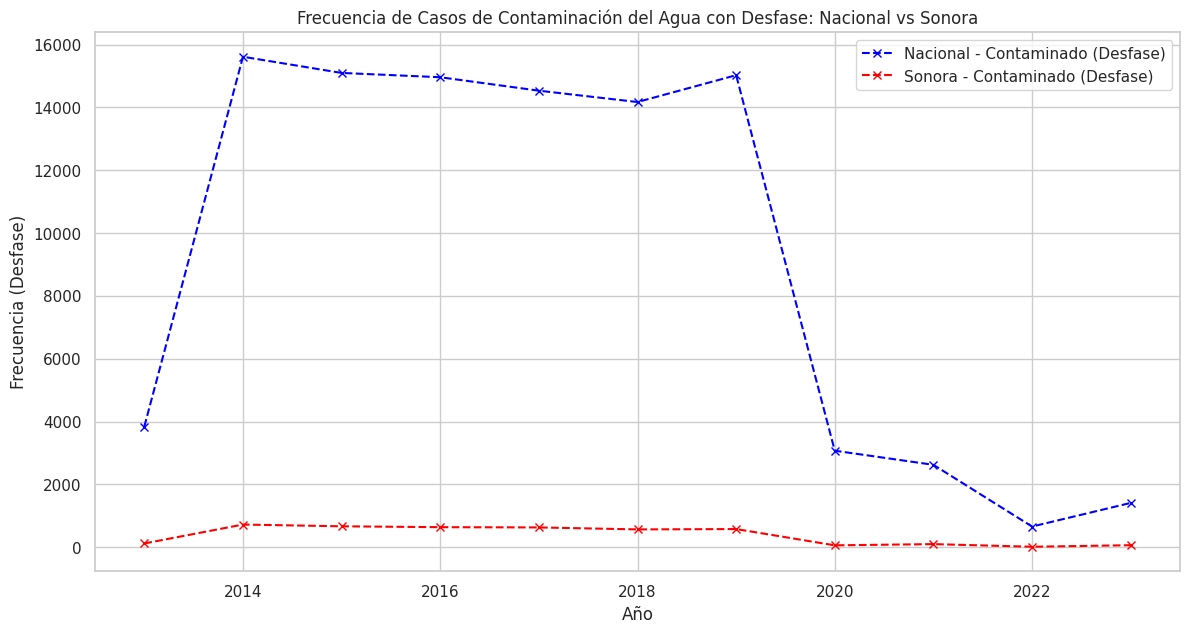

In [ ]:
# Gráfico 2: Frecuencia de Casos Contaminados con Desfase - Nacional vs Sonora
plt.figure(figsize=(14, 7))

plt.plot(df_nacional['Año'], df_nacional['Contaminado_shift'], label='Nacional - Contaminado (Desfase)', color='blue', linestyle='--', marker='x')
plt.plot(df_sonora['Año'], df_sonora['Contaminado_shift'], label='Sonora - Contaminado (Desfase)', color='red', linestyle='--', marker='x')

plt.xlabel('Año')
plt.ylabel('Frecuencia (Desfase)')
plt.title('Frecuencia de Casos de Contaminación del Agua con Desfase: Nacional vs Sonora')
plt.legend()
plt.grid(True)
plt.show()


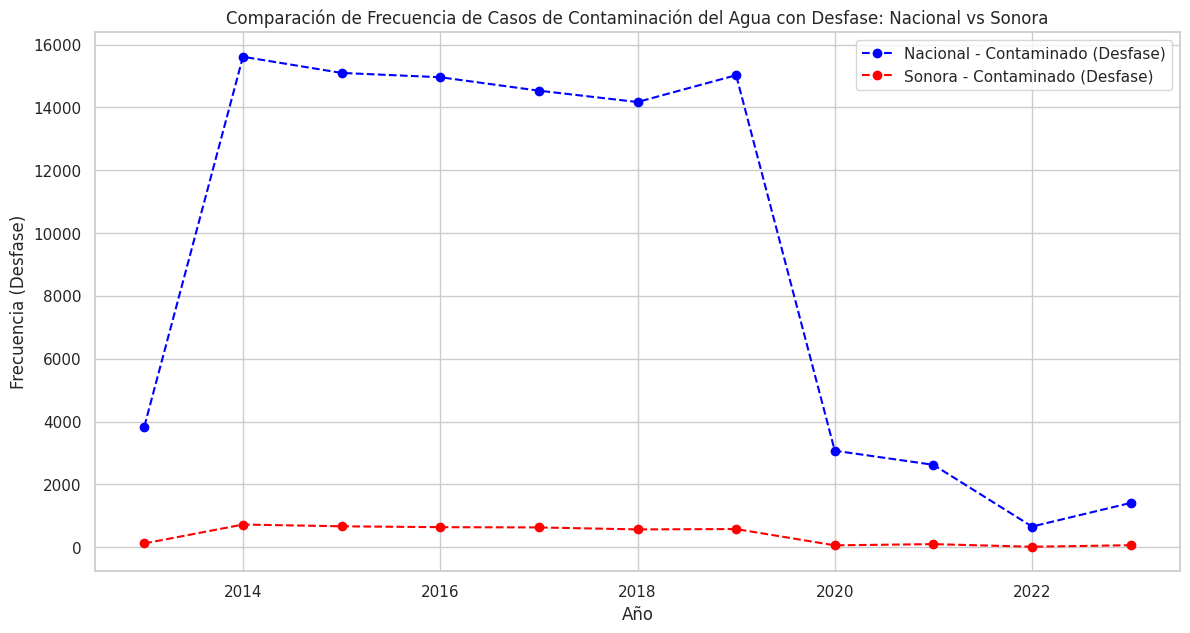

In [ ]:
# Gráfico 3: Comparación de Frecuencia de Casos Contaminados y No Contaminados con Desfase - Nacional vs Sonora
plt.figure(figsize=(14, 7))

# Contaminados con Desfase
plt.plot(df_nacional['Año'], df_nacional['Contaminado_shift'], label='Nacional - Contaminado (Desfase)', color='blue', linestyle='--', marker='o')
plt.plot(df_sonora['Año'], df_sonora['Contaminado_shift'], label='Sonora - Contaminado (Desfase)', color='red', linestyle='--', marker='o')

# No Contaminados con Desfase (si aplicas shift también a no contaminado)
# (Requiere que se aplique un shift similar al de contaminado)
# plt.plot(df_nacional['Año'], df_nacional['No Contaminado_shift'], label='Nacional - No Contaminado (Desfase)', color='green', linestyle='--', marker='x')
# plt.plot(df_sonora['Año'], df_sonora['No Contaminado_shift'], label='Sonora - No Contaminado (Desfase)', color='orange', linestyle='--', marker='x')

plt.xlabel('Año')
plt.ylabel('Frecuencia (Desfase)')
plt.title('Comparación de Frecuencia de Casos de Contaminación del Agua con Desfase: Nacional vs Sonora')
plt.legend()
plt.grid(True)
plt.show()


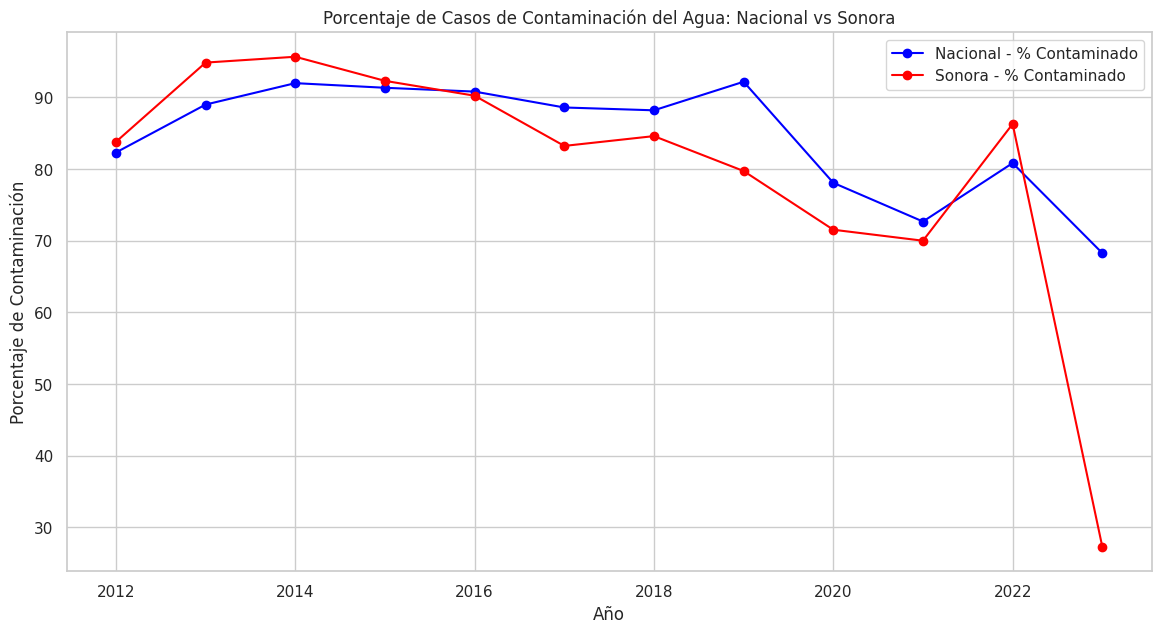

In [ ]:
# Calcular el porcentaje de casos contaminados por año a nivel nacional
df_nacional['Porcentaje_Contaminado'] = df_nacional['Contaminado'] / (df_nacional['Contaminado'] + df_nacional['No Contaminado']) * 100

# Calcular el porcentaje de casos contaminados por año en Sonora
df_sonora['Porcentaje_Contaminado'] = df_sonora['Contaminado'] / (df_sonora['Contaminado'] + df_sonora['No Contaminado']) * 100

# Crear el gráfico
plt.figure(figsize=(14, 7))

plt.plot(df_nacional['Año'], df_nacional['Porcentaje_Contaminado'], label='Nacional - % Contaminado', color='blue', marker='o')
plt.plot(df_sonora['Año'], df_sonora['Porcentaje_Contaminado'], label='Sonora - % Contaminado', color='red', marker='o')

plt.xlabel('Año')
plt.ylabel('Porcentaje de Contaminación')
plt.title('Porcentaje de Casos de Contaminación del Agua: Nacional vs Sonora')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Crear un DataFrame para los porcentajes combinados de Sonora y Nacional
df_combinado = pd.DataFrame({
    'Año': df_nacional['Año'],
    'Sonora_Contaminado': df_sonora['Contaminado'] / (df_sonora['Contaminado'] + df_sonora['No Contaminado']) * 100,
    'Sonora_No_Contaminado': df_sonora['No Contaminado'] / (df_sonora['Contaminado'] + df_sonora['No Contaminado']) * 100,
    'Nacional_Contaminado': df_nacional['Contaminado'] / (df_nacional['Contaminado'] + df_nacional['No Contaminado']) * 100,
    'Nacional_No_Contaminado': df_nacional['No Contaminado'] / (df_nacional['Contaminado'] + df_nacional['No Contaminado']) * 100
})

# Definir el ancho de las barras
bar_width = 0.35
index = np.arange(len(df_combinado['Año']))

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 7))

# Barras para Sonora
plt.bar(index, df_combinado['Sonora_Contaminado'], bar_width, label='Contaminado', color='red')
plt.bar(index, df_combinado['Sonora_No_Contaminado'], bar_width, bottom=df_combinado['Sonora_Contaminado'], label='No Contaminado', color='green')

# Barras para Nacional
plt.bar(index + bar_width, df_combinado['Nacional_Contaminado'], bar_width, label='Contaminado', color='red', alpha=0.6)
plt.bar(index + bar_width, df_combinado['Nacional_No_Contaminado'], bar_width, bottom=df_combinado['Nacional_Contaminado'], label='No Contaminado', color='green', alpha=0.6)

# Añadir etiquetas encima de las barras
for i in range(len(df_combinado)):
    plt.text(index[i], 110, 'Sonora', ha='center', va='bottom', fontsize=10, rotation=90)
    plt.text(index[i] + bar_width, 110, 'Resto del País', ha='center', va='bottom', fontsize=10, rotation=90)

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks(index + bar_width / 2, df_combinado['Año'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, axis='y')

# Mover el título a la parte inferior
plt.suptitle('Comparación de Contaminación del Agua: Sonora vs Resto del País', y=0.05, fontsize=14)

# Asegurar espacio para las etiquetas
plt.ylim(0, 120)
plt.show()



NameError: name 'np' is not defined

# 3. Elaborar una gráfica de barras para indicar, por año, la cantidad de contaminación que ha habido a nivel nacional a través de los años. Cada barra debe representar la cantidad de agua contaminada y la cantidad de agua limpia para cada año (estos cálculos deben realizarse basados en las mediciones realizadas indistintamente del lugar de medición).

In [ ]:
# Definir el ancho de las barras
bar_width = 0.7
index = np.arange(len(df_nacional['Año']))

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 7))

# Barras para la cantidad de agua contaminada
plt.bar(index, df_nacional['Contaminado'], bar_width, label='Contaminado', color='red')

# Barras para la cantidad de agua no contaminada (apiladas sobre las contaminadas)
plt.bar(index, df_nacional['No Contaminado'], bar_width, bottom=df_nacional['Contaminado'], label='No Contaminado', color='green')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Agua (Mediciones)')
plt.title('Cantidad de Agua Contaminada vs Agua No Contaminada por Año')
plt.xticks(index, df_nacional['Año'])
plt.legend(loc='upper left')
plt.grid(True, axis='y')

plt.show()

In [ ]:
# Definición de las métricas de cada modelo
modelos = {
    "Modelo 1": {"VP": 1153, "VN": 891, "FP": 27, "FN": 693},
    "Modelo 2": {"VP": 1246, "VN": 871, "FP": 47, "FN": 600},
    "Modelo 3": {"VP": 1538, "VN": 745, "FP": 173, "FN": 308},
    "Modelo 4": {"VP": 1746, "VN": 571, "FP": 347, "FN": 100},
}

# Función para calcular las métricas
def calcular_metricas(modelo):
    VP = modelo["VP"]
    VN = modelo["VN"]
    FP = modelo["FP"]
    FN = modelo["FN"]

    sensibilidad = VP / (VP + FN)
    precision = VP / (VP + FP)
    exactitud = (VP + VN) / (VP + VN + FP + FN)
    especificidad = VN / (VN + FP)

    return {
        "Sensibilidad": sensibilidad,
        "Precisión": precision,
        "Exactitud": exactitud,
        "Especificidad": especificidad
    }

# Calcular y mostrar las métricas para cada modelo
for modelo_nombre, valores in modelos.items():
    metricas = calcular_metricas(valores)
    print(f"{modelo_nombre}:")
    print(f"  Sensibilidad: {metricas['Sensibilidad']:.4f}")
    print(f"  Precisión: {metricas['Precisión']:.4f}")
    print(f"  Exactitud: {metricas['Exactitud']:.4f}")
    print(f"  Especificidad: {metricas['Especificidad']:.4f}")
    print()



In [ ]:

# Definir los valores de VP, VN, FP, FN para cada modelo
modelos = {
    "Modelo 1": {"VP": 1153, "VN": 891, "FP": 27, "FN": 693},
    "Modelo 2": {"VP": 1246, "VN": 871, "FP": 47, "FN": 600},
    "Modelo 3": {"VP": 1538, "VN": 745, "FP": 173, "FN": 308},
    "Modelo 4": {"VP": 1746, "VN": 571, "FP": 347, "FN": 100},
}

# Función para generar y mostrar la matriz de confusión
def mostrar_matriz_confusion(modelo_nombre, valores):
    # Crear la matriz de confusión manualmente
    matriz_confusion = np.array([[valores["VN"], valores["FP"]],
                                 [valores["FN"], valores["VP"]]])

    # Visualizar la matriz de confusión
    sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicho No", "Predicho Sí"],
                yticklabels=["Real No", "Real Sí"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {modelo_nombre}")
    plt.show()

# Mostrar la matriz de confusión para cada modelo
for modelo_nombre, valores in modelos.items():
    mostrar_matriz_confusion(modelo_nombre, valores)


## Conclusión

# Modelo 2 parece ser la mejor opción en este caso porque ofrece un equilibrio sólido entre todas las métricas clave. Su alta precisión y especificidad sugieren que es menos probable que genere falsos positivos, lo cual es crucial cuando se quiere minimizar la cantidad de sitios de agua que se clasifican incorrectamente como contaminados.

# Si el objetivo principal del problema de la contaminación del agua es detectar de manera efectiva todos los casos de contaminación, evitando al mismo tiempo alarmas innecesarias, Modelo 2 sería la elección más adecuada. Este modelo ofrece una alta precisión y especificidad, lo que es ideal cuando se necesita confianza en las predicciones y se busca evitar sobreestimar la contaminación del agua.

# Sin embargo, si la prioridad fuera detectar todos los casos posibles de contaminación, incluso si eso significa aceptar más falsos positivos, Modelo 1 podría ser preferible debido a su alta sensibilidad.